In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Диагностика моделей классификации

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


In [ ]:
#pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

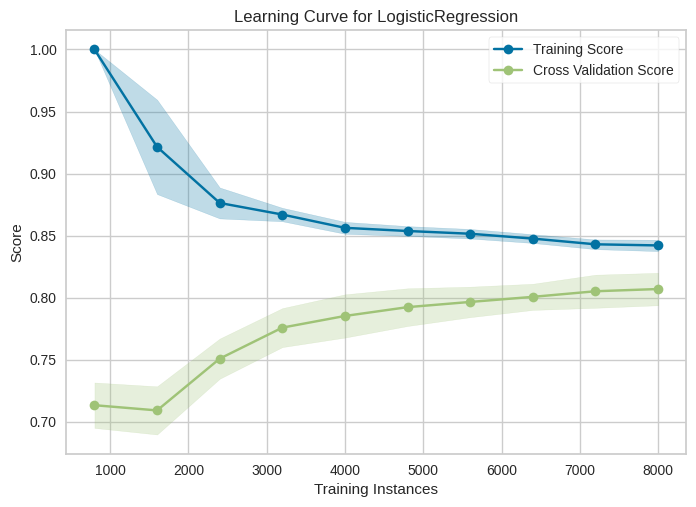

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

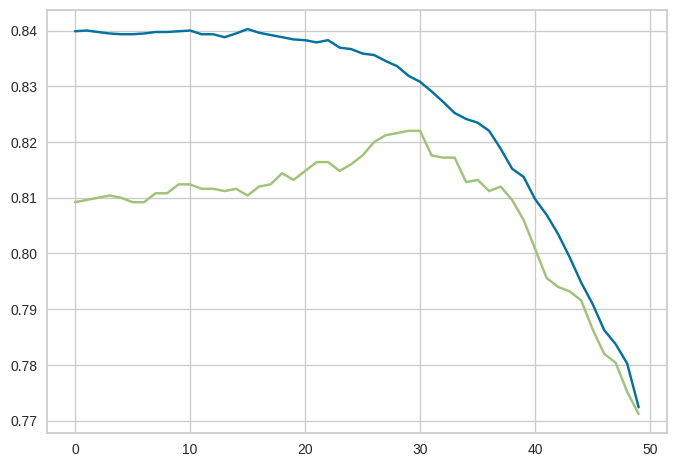

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


### Диагностика моделей регрессии

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

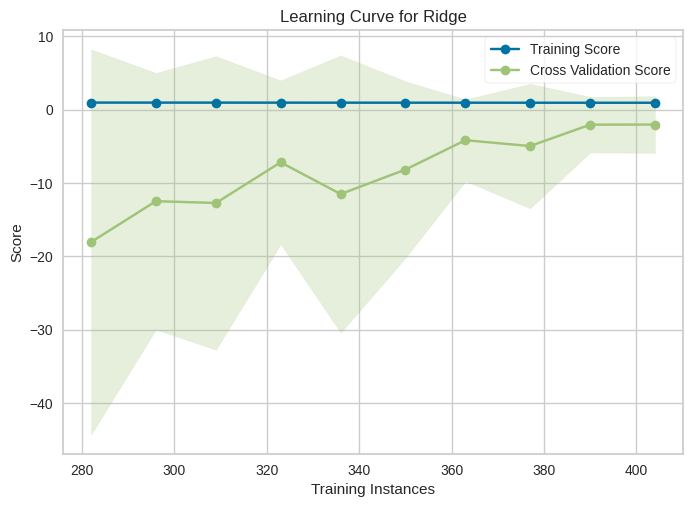

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import Ridge
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.linear_model import Ridge
trains = []
tests = []
for i in np.logspace(-2, 3, 100):
  ridge = Ridge(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


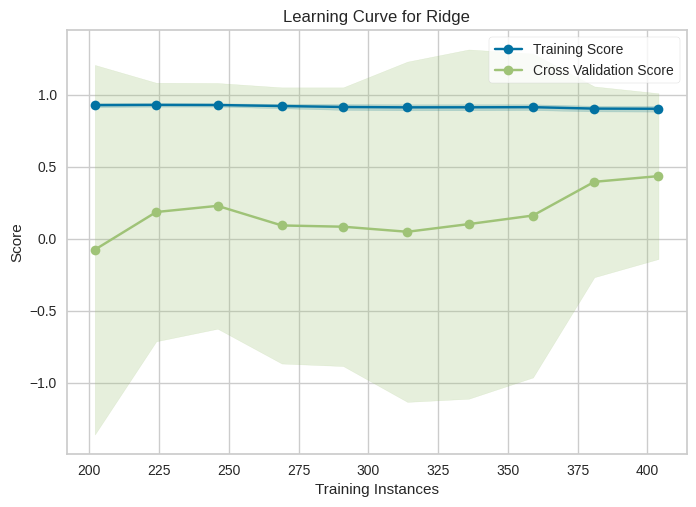

In [ ]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

### Диагностика на реальных данных

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

### Диагностика недообучения

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

In [ ]:
visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# 1.
**Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


$$\text{precision} = \frac{TP}{TP+FP}$$

In [ ]:
from sklearn.metrics import precision_score

print(f"Training score: {precision_score(y_train, lr.predict(X_train)):.4f}")
print(f"Test score: {precision_score(y_test, lr.predict(X_test)):.4f}")

Training score: 0.8339
Test score: 0.8069


$$\text{recall} = \frac{TP}{TP+FN}$$

In [ ]:
from sklearn.metrics import recall_score

print(f"Training score: {recall_score(y_train, lr.predict(X_train)):.4f}")
print(f"Test score: {recall_score(y_test, lr.predict(X_test)):.4f}")

Training score: 0.8515
Test score: 0.8056


$$\text{f1} = 2 \frac{precision \cdot recall}{precision+recall} = \frac{TP}{TP + \frac{FP+FN}{2}}$$

In [ ]:
from sklearn.metrics import f1_score

print(f"Training score: {f1_score(y_train, lr.predict(X_train)):.4f}")
print(f"Test score: {f1_score(y_test, lr.predict(X_test)):.4f}")

Training score: 0.8426
Test score: 0.8062


# 2.
**Повторите диагностику модели регрессии с использованием других видов моделей:\
    I. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)\
   II. метода ближайших соседей (исследуйте влияние количества соседей)\
  III. метода решающих деревьев (гиперпараметры по вашему выбору)**

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
# I. SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

model = SVR().fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.6505
Test score: 0.4488


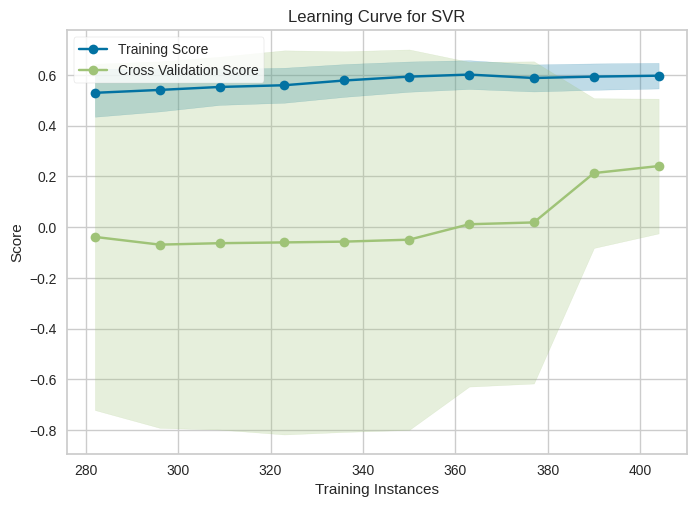

In [ ]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    SVR(), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

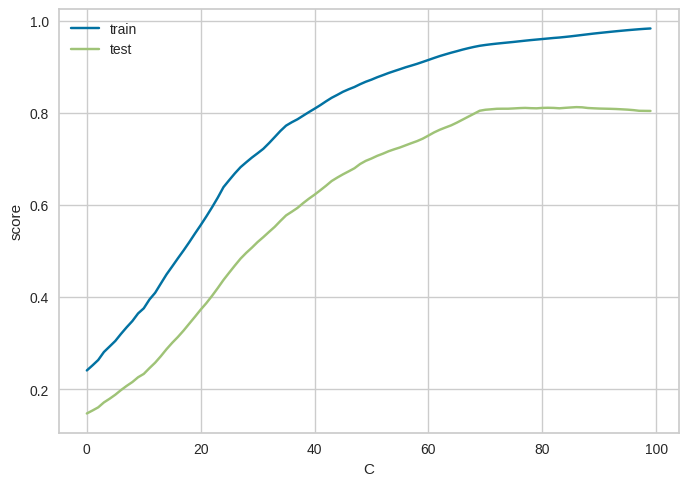

In [ ]:
trains = []
tests = []
for i in np.logspace(-1, 3, 100):
    model = SVR(C=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

In [ ]:
model = SVR(C=80).fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.9508
Test score: 0.8093


In [ ]:
#pip install threadpoolctl --upgrade

In [ ]:
# II. KNN
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.8954
Test score: 0.6111


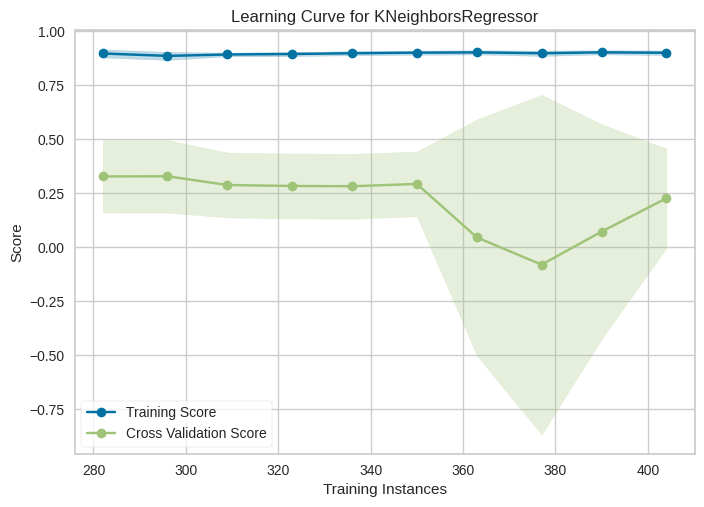

In [ ]:
#from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=3), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

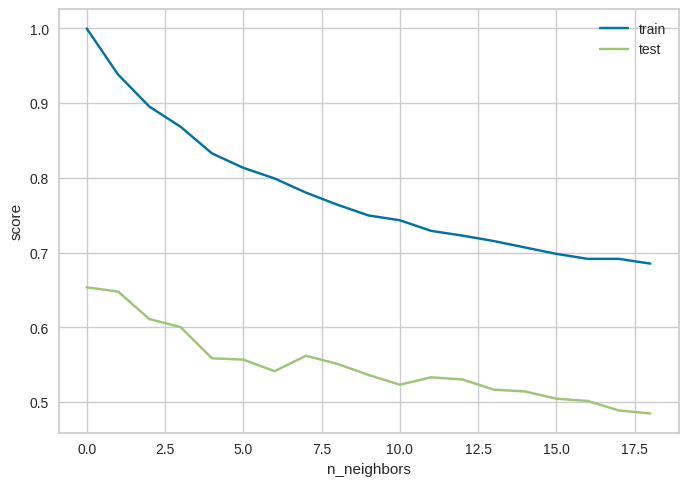

In [ ]:
trains = []
tests = []
for i in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [ ]:
# III. DTree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.6589


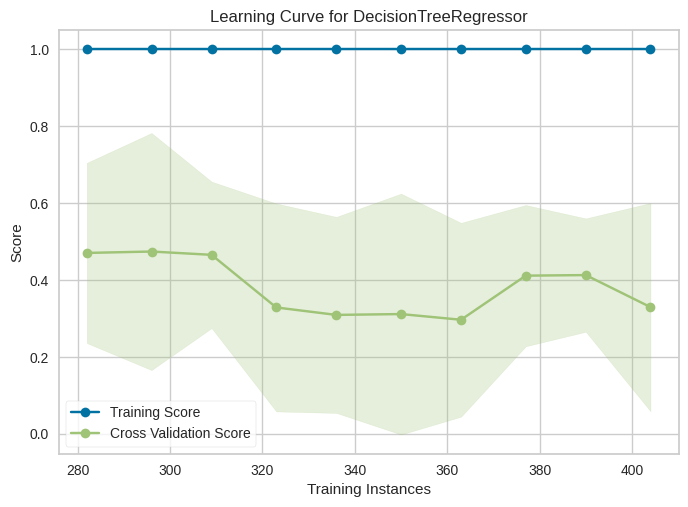

In [ ]:
#from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    DecisionTreeRegressor(), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

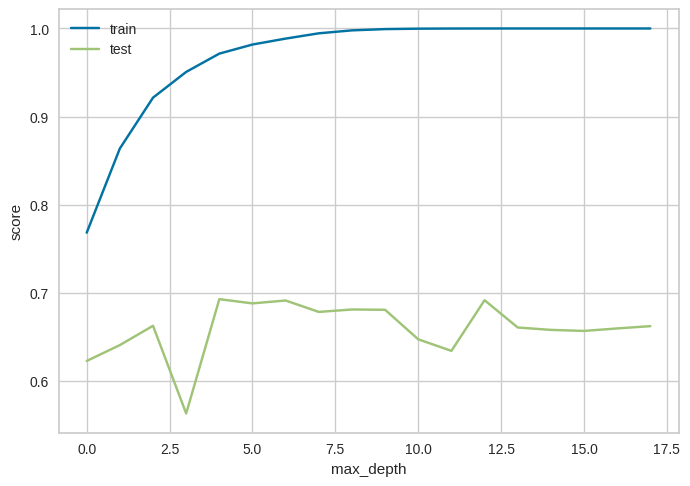

In [ ]:
trains = []
tests = []
for i in range(2, 20):
    model = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

# 3.
**Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.**

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.2932
Test score: 0.2094


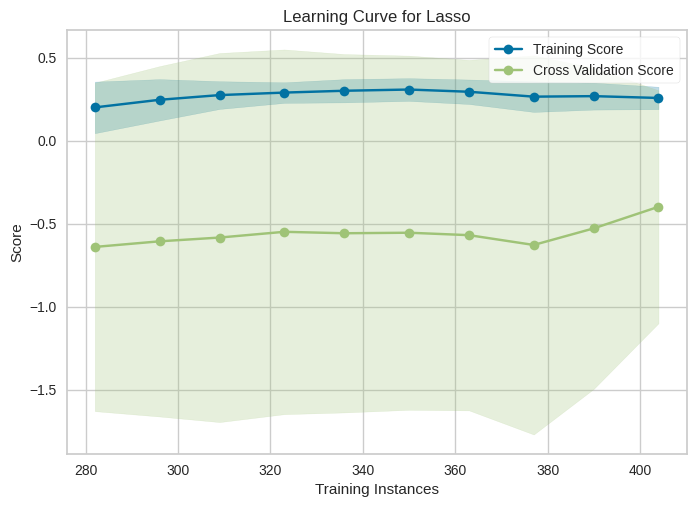

In [ ]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    Lasso(), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.353e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.428e+02, tolerance: 3.233e+00

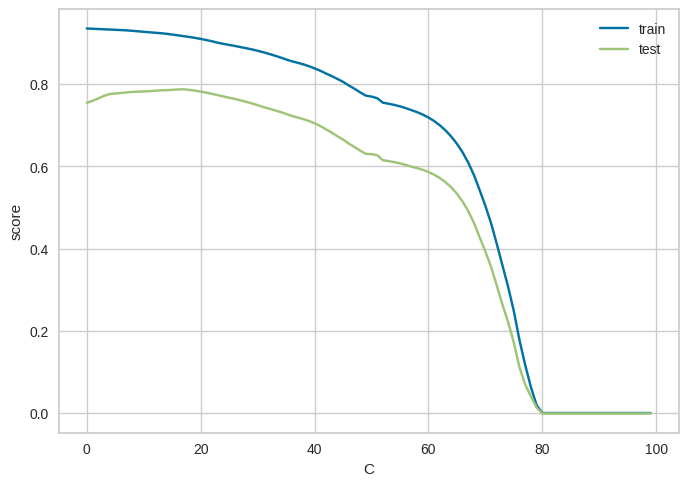

In [ ]:
trains = []
tests = []
for i in np.logspace(-3, 1, 100):
    model = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

In [ ]:
np.logspace(-3, 1, 100)[18]

0.005336699231206312

In [ ]:
model = Lasso(alpha=0.00486).fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.9167
Test score: 0.7874


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.025e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


# 4.
**В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.**

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet().fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.3284
Test score: 0.2217


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+03, tolerance: 3.233e+00

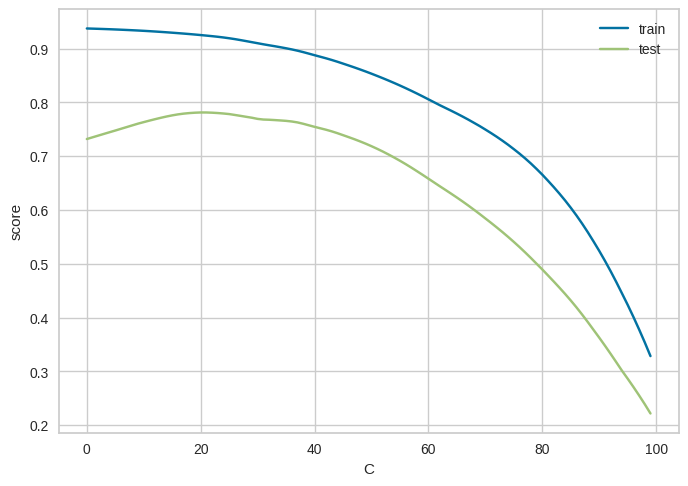

In [ ]:
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
    model = ElasticNet(alpha=i).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

In [ ]:
np.logspace(-4, 0, 100)[20]

0.0006428073117284319

In [ ]:
model = ElasticNet(alpha=np.logspace(-4, 0, 100)[20]).fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.9252
Test score: 0.7813


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


# 5.
**Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % f1_score(y_train, y_train_pred))
print("Test score = %.4f" % f1_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.6379


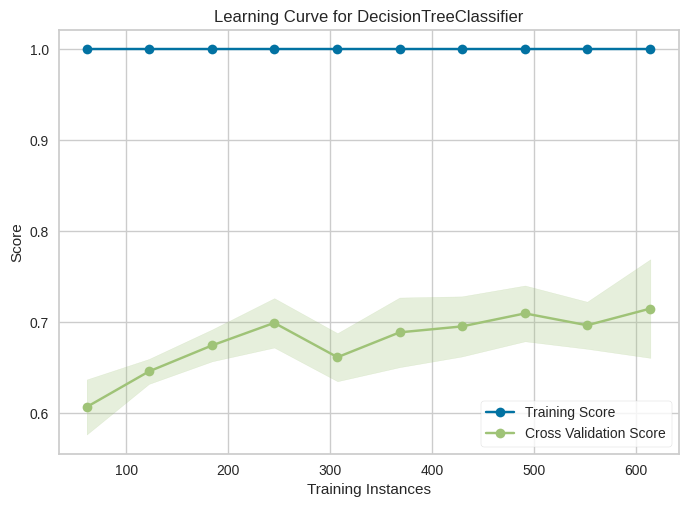

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

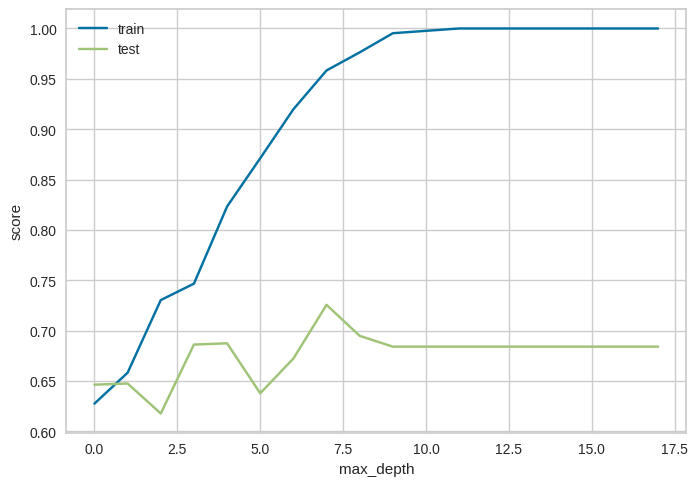

In [ ]:
trains = []
tests = []
for i in range(2,20):
    model = DecisionTreeClassifier(max_depth=i, random_state=5).fit(X_train, y_train)
    trains.append(f1_score(y_train, model.predict(X_train)))
    tests.append(f1_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=9, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % f1_score(y_train, y_train_pred))
print("Test score = %.4f" % f1_score(y_test, y_pred))

Train score = 0.9583
Test score = 0.7257


# 6.

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# phoneme
phoneme = fetch_openml(name='phoneme')
X = phoneme['data']
y = pd.Series(phoneme['target']).astype('int') - 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name phoneme exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.8594


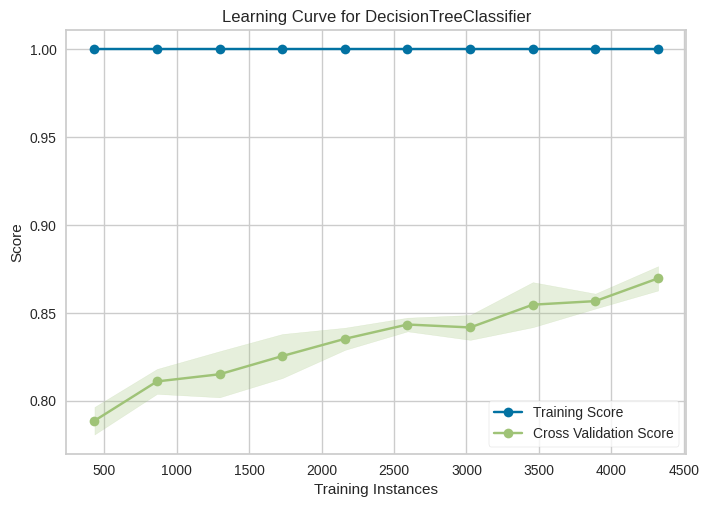

In [ ]:
# переобучение
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    DecisionTreeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

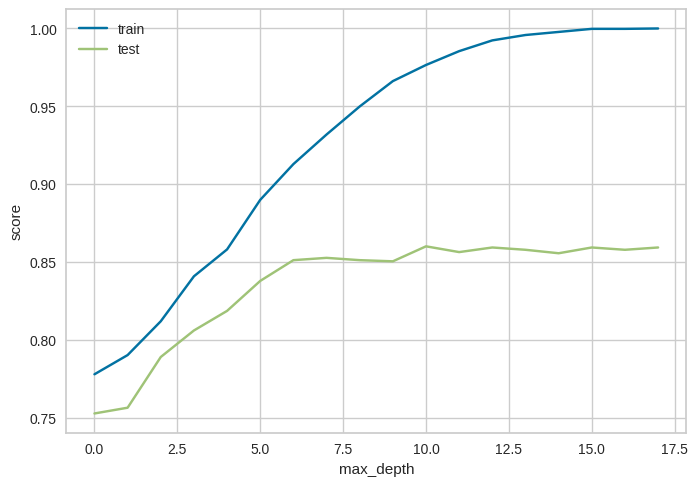

In [ ]:
trains = []
tests = []
for i in range(2,20):
    model = DecisionTreeClassifier(max_depth=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.8979


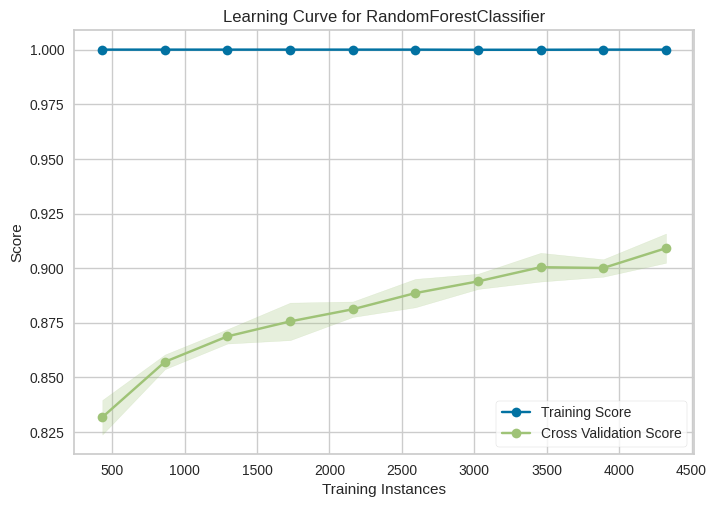

In [ ]:
visualizer = LearningCurve(
    RandomForestClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

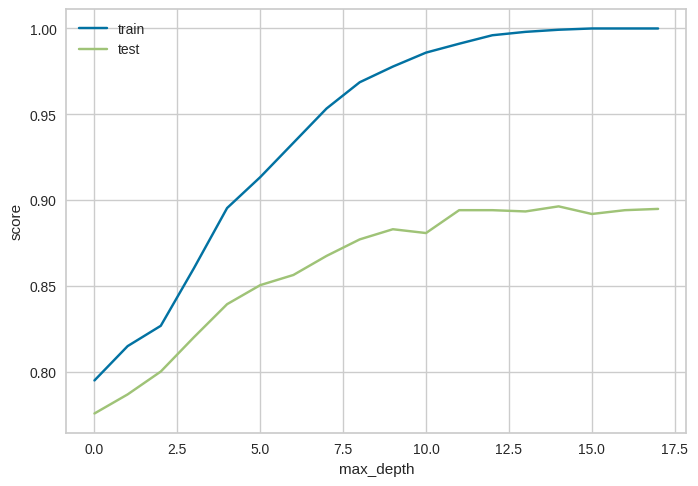

In [ ]:
trains = []
tests = []
for i in range(2,20):
    model = RandomForestClassifier(max_depth=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

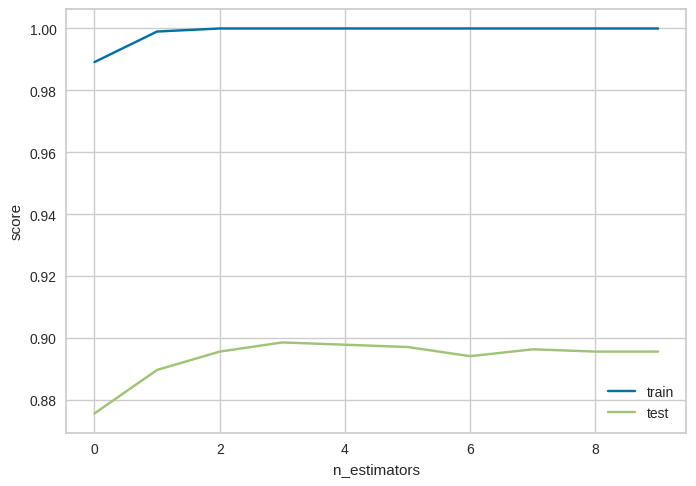

In [ ]:
trains = []
tests = []
for i in range(5,200,20):
    model = RandomForestClassifier(n_estimators=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [ ]:
# best model
model = RandomForestClassifier(max_depth=16, n_estimators=65, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9995
Test score = 0.8949


In [ ]:
# banknote-authentication
phoneme = fetch_openml(name='banknote-authentication')
X = phoneme['data']
y = pd.Series(phoneme['target']).astype('int') - 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9193
Test score = 0.9096


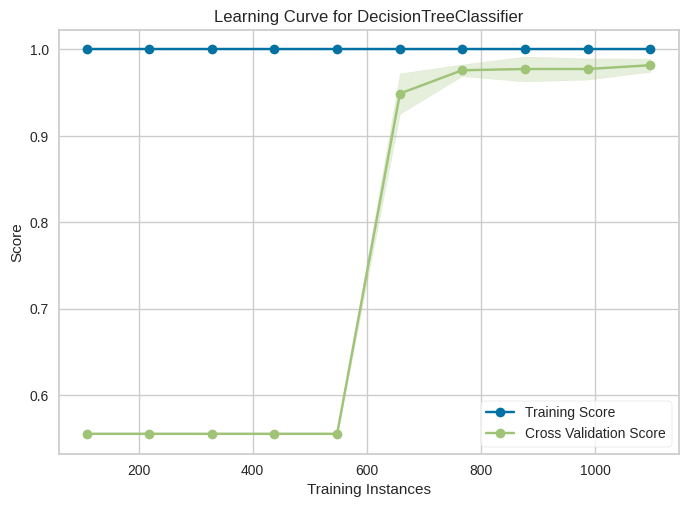

In [ ]:
# недообучение
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    DecisionTreeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

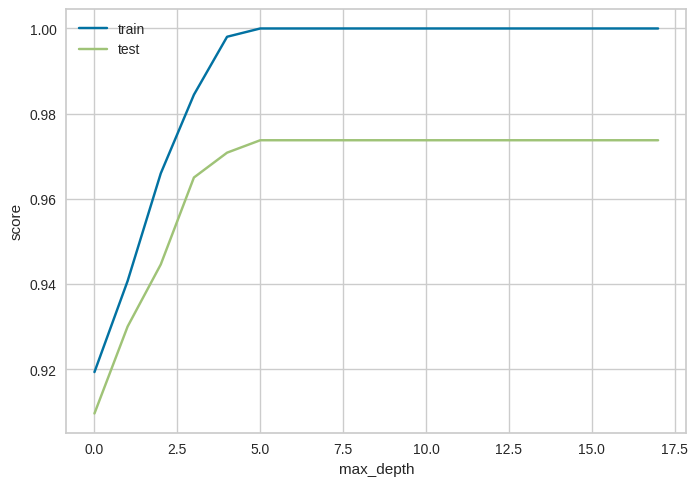

In [ ]:
trains = []
tests = []
for i in range(2,20):
    model = DecisionTreeClassifier(max_depth=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.9825


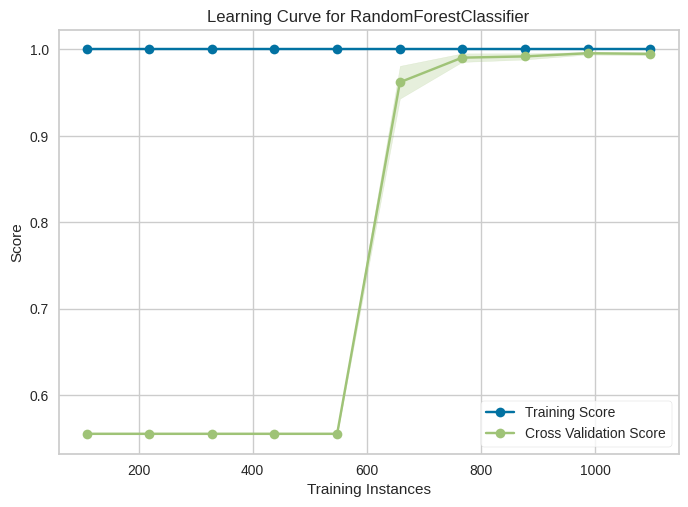

In [ ]:
visualizer = LearningCurve(
    RandomForestClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

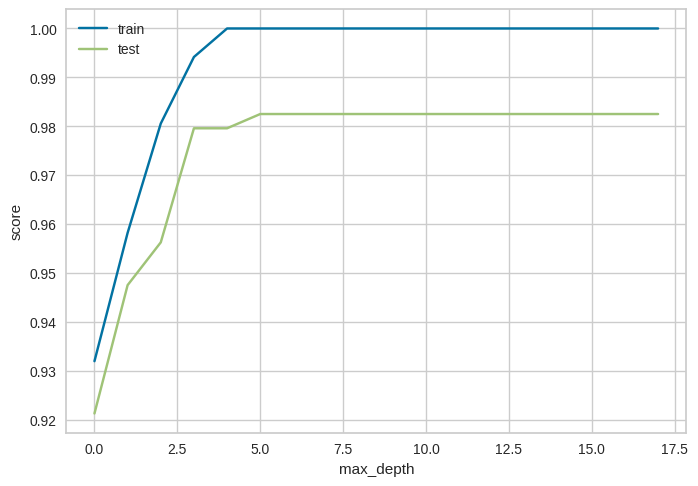

In [ ]:
trains = []
tests = []
for i in range(2,20):
    model = RandomForestClassifier(max_depth=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

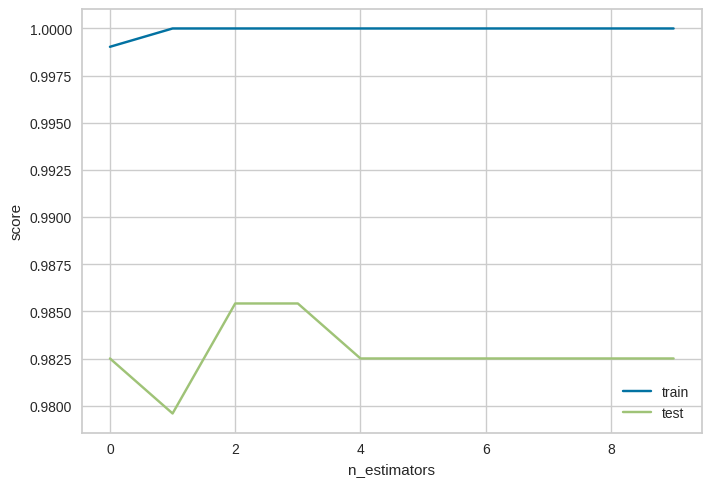

In [ ]:
trains = []
tests = []
for i in range(5,200,20):
    model = RandomForestClassifier(n_estimators=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [ ]:
# best model
model = RandomForestClassifier(max_depth=16, n_estimators=65, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.9854


In [ ]:
phoneme['target']=='P'

0        True
1       False
2        True
3        True
4       False
        ...  
7124    False
7125     True
7126     True
7127    False
7128    False
Name: binaryClass, Length: 7129, dtype: bool

In [ ]:
# delta_ailerons
phoneme = fetch_openml(name='delta_ailerons')
X = phoneme['data']
y = pd.Series(phoneme['target']=='P').astype('int') - 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.5812
Test score = 0.5788


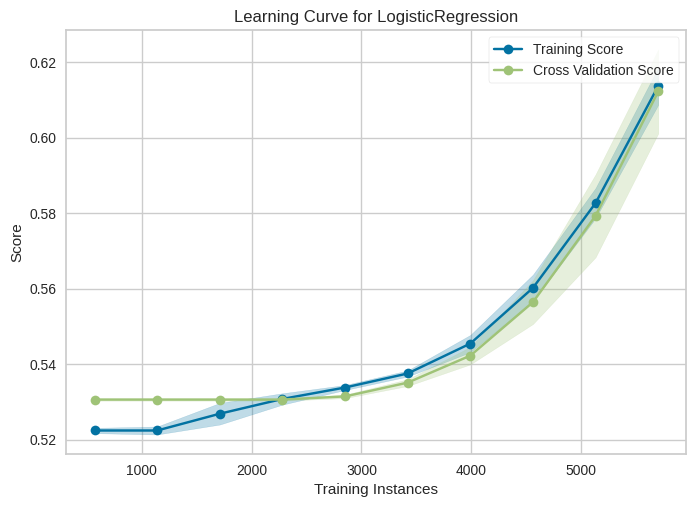

In [ ]:
# недообучение
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

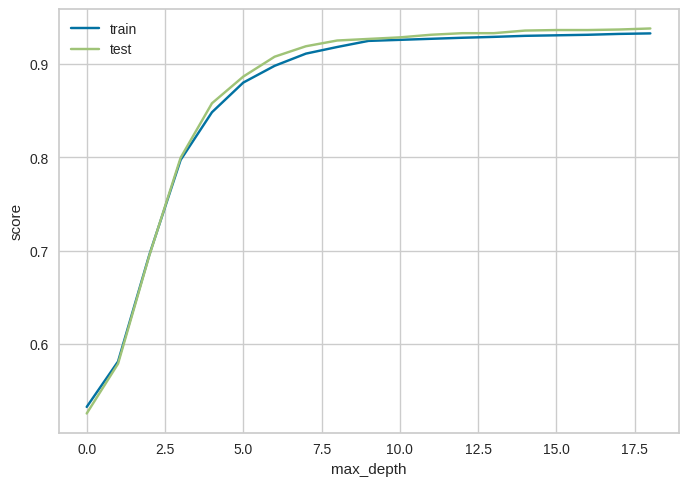

In [ ]:
trains = []
tests = []
for i in np.arange(0.5,10,0.5):
    model = LogisticRegression(C=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
# best model
model = LogisticRegression(C=6, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9272
Test score = 0.9316


In [ ]:
# mammography
phoneme = fetch_openml(name='mammography')
X = phoneme['data']
y = pd.Series(phoneme['target']).astype('int') - 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9826
Test score = 0.9871


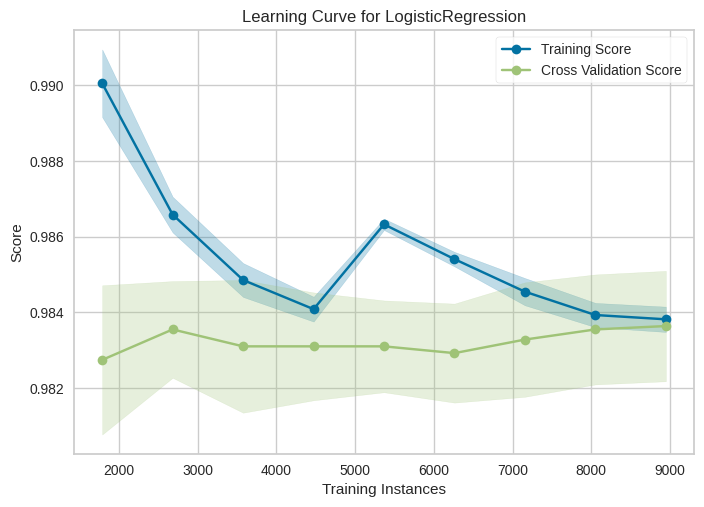

In [ ]:
# недообучение
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

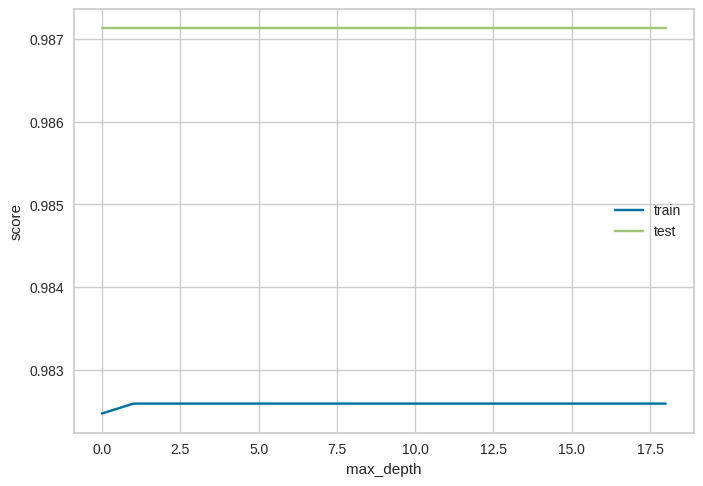

In [ ]:
trains = []
tests = []
for i in np.arange(0.5,10,0.5):
    model = LogisticRegression(C=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
# best model
model = LogisticRegression(C=6, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9826
Test score = 0.9871


In [ ]:
# electricity
phoneme = fetch_openml(name='electricity')
X = phoneme['data']
y = pd.Series(phoneme['target']).astype('int') - 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9826
Test score = 0.9871


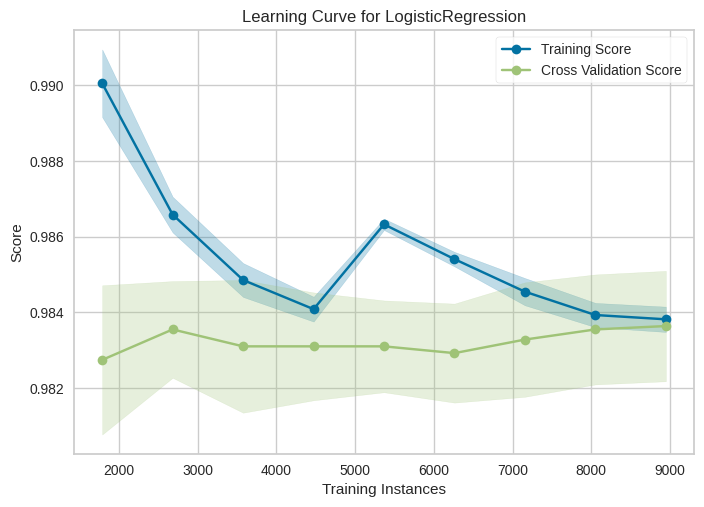

In [ ]:
# недообучение
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

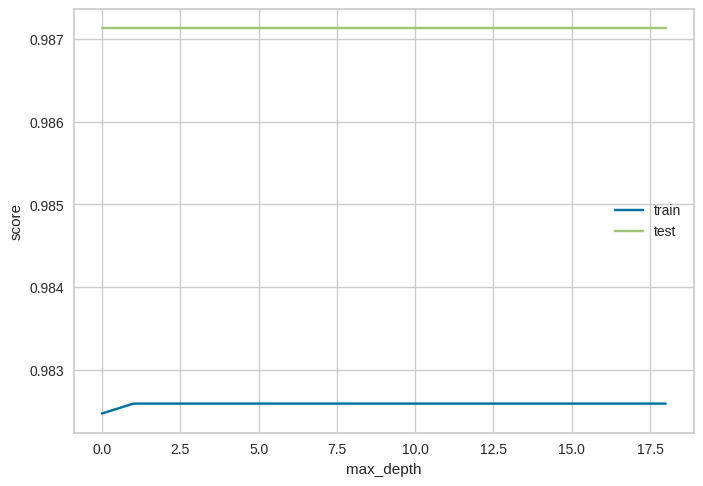

In [ ]:
trains = []
tests = []
for i in np.arange(0.5,10,0.5):
    model = LogisticRegression(C=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
# best model
model = LogisticRegression(C=6, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9826
Test score = 0.9871


In [ ]:
# mammography
phoneme = fetch_openml(name='mammography')
X = phoneme['data']
y = pd.Series(phoneme['target']).astype('int') - 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9826
Test score = 0.9871


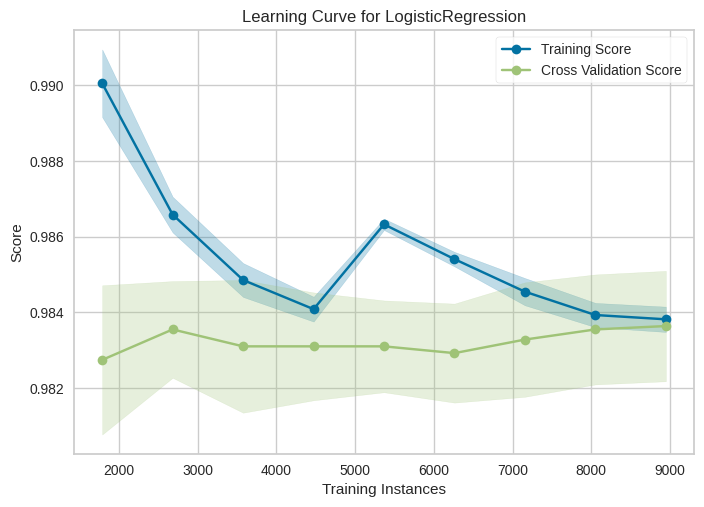

In [ ]:
# недообучение
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

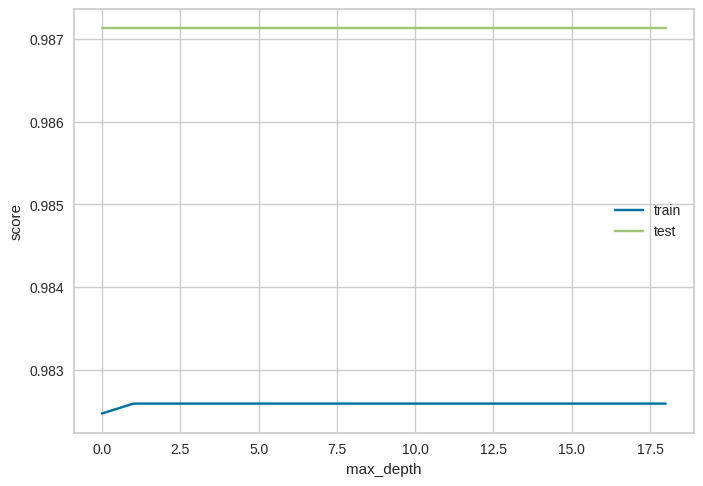

In [ ]:
trains = []
tests = []
for i in np.arange(0.5,10,0.5):
    model = LogisticRegression(C=i, random_state=5).fit(X_train, y_train)
    trains.append(accuracy_score(y_train, model.predict(X_train)))
    tests.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
# best model
model = LogisticRegression(C=6, random_state=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9826
Test score = 0.9871
